In [195]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])

from statsmodels.tsa.seasonal import seasonal_decompose

In [196]:
bitcoin_df = pd.read_csv('./data/bitcoin.csv', parse_dates=['timestamp'], index_col='timestamp')
bitcoin_df.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
timestamp,,,,,,,,,,,
1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643,6.779922,Bitcoin
1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037,6.779922,Bitcoin
1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309,6.779922,Bitcoin
1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999,6.779922,Bitcoin
1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079,6.779922,Bitcoin


preprocessing

In [197]:
bitcoin_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956282 entries, 1514764860 to 1632182400
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Asset_ID    1956282 non-null  int64  
 1   Count       1956282 non-null  float64
 2   Open        1956282 non-null  float64
 3   High        1956282 non-null  float64
 4   Low         1956282 non-null  float64
 5   Close       1956282 non-null  float64
 6   Volume      1956282 non-null  float64
 7   VWAP        1956282 non-null  float64
 8   Target      1955978 non-null  float64
 9   Weight      1956282 non-null  float64
 10  Asset_Name  1956282 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 179.1+ MB


In [198]:
bitcoin_df.isnull().sum()

Asset_ID        0
Count           0
Open            0
High            0
Low             0
Close           0
Volume          0
VWAP            0
Target        304
Weight          0
Asset_Name      0
dtype: int64

In [199]:
bitcoin_df.dropna(inplace=True)
bitcoin_df.isnull().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target        0
Weight        0
Asset_Name    0
dtype: int64

In [200]:
(bitcoin_df.index[1:] - bitcoin_df.index[:-1]).value_counts()

60      1955857
120          59
180          14
600           5
240           5
360           5
420           4
900           3
720           3
540           3
300           3
660           2
4500          1
1140          1
1200          1
3300          1
1020          1
1440          1
2040          1
8700          1
4680          1
780           1
2880          1
4020          1
3000          1
480           1
Name: timestamp, dtype: int64

In [201]:
count = 0
# get an array filled with intervals of 60 seconds between the first/last indexes of bitcoin_df
modified_timestamp = range(bitcoin_df.index[0], bitcoin_df.index[-1]+60, 60)

# Replace the existing index with the index we created
# When an index that does not exist before is created, the values ​​to be filled are taken from the index immediately preceding.
bitcoin_df = bitcoin_df.reindex(modified_timestamp, method='pad')

# check intervals of timestamp again!
(bitcoin_df.index[1:] - bitcoin_df.index[:-1]).value_counts()

60    1956943
Name: timestamp, dtype: int64

In [202]:
# Convert Unix timestamp to 'datetime' in seconds for readability
bitcoin_df.index = pd.to_datetime(bitcoin_df.index, unit='s')
bitcoin_df.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
timestamp,,,,,,,,,,,
2018-01-01 00:01:00,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643,6.779922,Bitcoin
2018-01-01 00:02:00,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037,6.779922,Bitcoin
2018-01-01 00:03:00,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309,6.779922,Bitcoin
2018-01-01 00:04:00,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999,6.779922,Bitcoin
2018-01-01 00:05:00,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079,6.779922,Bitcoin


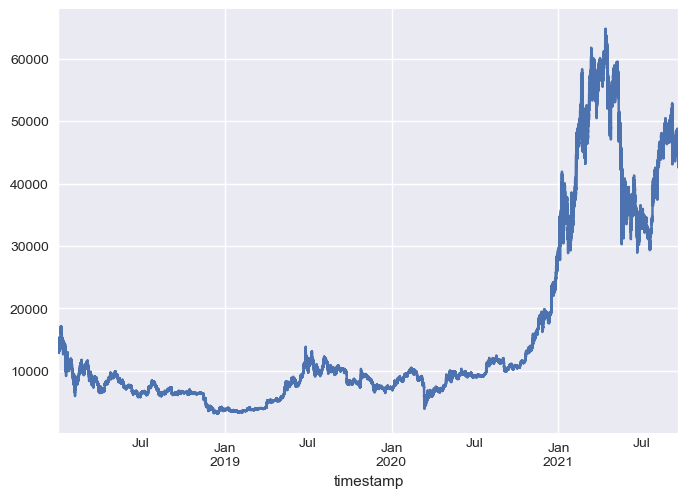

In [203]:
bitcoin_df['Close'].plot();

Above, while loading the data, we put the time axis as an index. This is where this benefit comes in, which makes indexing time series data very comfortable, as shown below.

In [204]:
# Get transaction data for 2019
bitcoin_df['2019'].head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
timestamp,,,,,,,,,,,
2019-01-01 00:00:00,1,341.0,3714.686667,3830.5,3685.00,3718.340000,89.779135,3717.514065,0.001607,6.779922,Bitcoin
2019-01-01 00:01:00,1,560.0,3719.266667,3834.1,3686.62,3715.408333,83.279133,3718.082766,0.002229,6.779922,Bitcoin
2019-01-01 00:02:00,1,179.0,3715.693333,3832.0,3686.62,3715.575000,58.449333,3715.337436,0.002071,6.779922,Bitcoin
2019-01-01 00:03:00,1,160.0,3714.317143,3831.7,3686.71,3713.845126,26.297493,3713.827410,0.002741,6.779922,Bitcoin
2019-01-01 00:04:00,1,181.0,3715.635000,3831.8,3686.63,3714.923333,41.494762,3715.304326,0.000715,6.779922,Bitcoin


In [205]:
# Get a statistical summary output for 2019.
bitcoin_df['2019'].describe()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight
count,525600.0,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,5.256000e+05,5.256000e+05
mean,1.0,563.142662,7360.375563,7407.467761,7334.653104,7360.331442,79.415438,7360.312536,1.623693e-05,6.779922e+00
std,0.0,659.222215,2638.826405,2619.056349,2640.901979,2638.778260,141.873118,2638.762826,1.969619e-03,6.217255e-15
min,1.0,1.000000,3357.014286,3384.190000,3322.190000,3357.197143,0.000100,3360.058156,-5.362141e-02,6.779922e+00
25%,1.0,272.000000,4684.128408,4754.836653,4616.892500,4684.347917,25.423296,4684.097693,-7.611545e-04,6.779922e+00
50%,1.0,396.000000,7819.206429,7841.921283,7798.615000,7819.247852,43.357976,7819.071816,5.324519e-08,6.779922e+00
75%,1.0,610.000000,9570.187321,9591.200000,9552.115000,9569.660653,79.770605,9570.134528,7.583315e-04,6.779922e+00
max,1.0,22506.000000,13879.500000,13970.000000,13751.000000,13878.840000,4580.398919,13872.269530,9.278919e-02,6.779922e+00


In [206]:
# You can also slice a specific period conveniently.
bitcoin_df['2019-02-02 00:02:00':'2019-02-02 00:05:00']

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
timestamp,,,,,,,,,,,
2019-02-02 00:02:00,1,244.0,3462.037632,3533.500000,3433.72,3462.768433,41.494633,3462.475046,-0.001410,6.779922,Bitcoin
2019-02-02 00:03:00,1,172.0,3462.873433,3533.400599,3434.97,3461.991667,24.481865,3462.469241,0.001250,6.779922,Bitcoin
2019-02-02 00:04:00,1,257.0,3461.981667,3533.475788,3433.81,3461.290965,45.089085,3461.729826,0.000282,6.779922,Bitcoin
2019-02-02 00:05:00,1,279.0,3458.467143,3533.600000,3435.52,3459.461429,48.549038,3458.807547,0.000947,6.779922,Bitcoin


In [207]:
bitcoin_df = bitcoin_df['2021']
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378705 entries, 2021-01-01 00:00:00 to 2021-09-20 23:44:00
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Asset_ID    378705 non-null  int64  
 1   Count       378705 non-null  float64
 2   Open        378705 non-null  float64
 3   High        378705 non-null  float64
 4   Low         378705 non-null  float64
 5   Close       378705 non-null  float64
 6   Volume      378705 non-null  float64
 7   VWAP        378705 non-null  float64
 8   Target      378705 non-null  float64
 9   Weight      378705 non-null  float64
 10  Asset_Name  378705 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 34.7+ MB


In [208]:
bitcoin_df.index

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:01:00',
               '2021-01-01 00:02:00', '2021-01-01 00:03:00',
               '2021-01-01 00:04:00', '2021-01-01 00:05:00',
               '2021-01-01 00:06:00', '2021-01-01 00:07:00',
               '2021-01-01 00:08:00', '2021-01-01 00:09:00',
               ...
               '2021-09-20 23:35:00', '2021-09-20 23:36:00',
               '2021-09-20 23:37:00', '2021-09-20 23:38:00',
               '2021-09-20 23:39:00', '2021-09-20 23:40:00',
               '2021-09-20 23:41:00', '2021-09-20 23:42:00',
               '2021-09-20 23:43:00', '2021-09-20 23:44:00'],
              dtype='datetime64[ns]', name='timestamp', length=378705, freq=None)

In [209]:
bitcoin_df[['Close']]

,Close
timestamp,
2021-01-01 00:00:00,28948.192734
2021-01-01 00:01:00,29032.387500
2021-01-01 00:02:00,29002.956734
2021-01-01 00:03:00,29005.580000
2021-01-01 00:04:00,29000.490000
...,...
2021-09-20 23:40:00,42703.636250
2021-09-20 23:41:00,42781.970571
2021-09-20 23:42:00,42755.592500


`seasonal_decompose()` basically performs time series decomposition in units of one day. Since we have data in minutes, we will enter 24*60(convert day to 1 minute) as the period option.

In [210]:
bitcoin_df['2021-01']

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
timestamp,,,,,,,,,,,
2021-01-01 00:00:00,1,2135.0,28950.497500,29024.59,28903.86,28948.192734,117.463121,28952.473085,0.000990,6.779922,Bitcoin
2021-01-01 00:01:00,1,4039.0,28985.511250,29086.90,28960.00,29032.387500,163.787036,29017.664870,0.000396,6.779922,Bitcoin
2021-01-01 00:02:00,1,1969.0,29031.175000,29079.56,28951.50,29002.956734,98.754670,29014.703526,-0.000069,6.779922,Bitcoin
2021-01-01 00:03:00,1,1689.0,29002.977509,29069.39,28967.80,29005.580000,55.202131,29003.078663,-0.000137,6.779922,Bitcoin
2021-01-01 00:04:00,1,1146.0,29004.293750,29057.73,28971.80,29000.490000,56.575903,29006.256629,-0.000682,6.779922,Bitcoin
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 23:55:00,1,3610.0,33204.828571,33268.78,33168.80,33236.725714,171.534872,33230.066199,-0.004725,6.779922,Bitcoin
2021-01-31 23:56:00,1,3863.0,33239.205714,33265.46,33072.34,33124.841429,179.478791,33178.821738,-0.004129,6.779922,Bitcoin
2021-01-31 23:57:00,1,3469.0,33124.176577,33154.00,33049.39,33083.124286,141.146385,33087.730999,-0.004783,6.779922,Bitcoin


In [237]:
decomp = seasonal_decompose(bitcoin_df['2021-01-01':'2021-01-02']['Close'], model='additive', period=24*60)

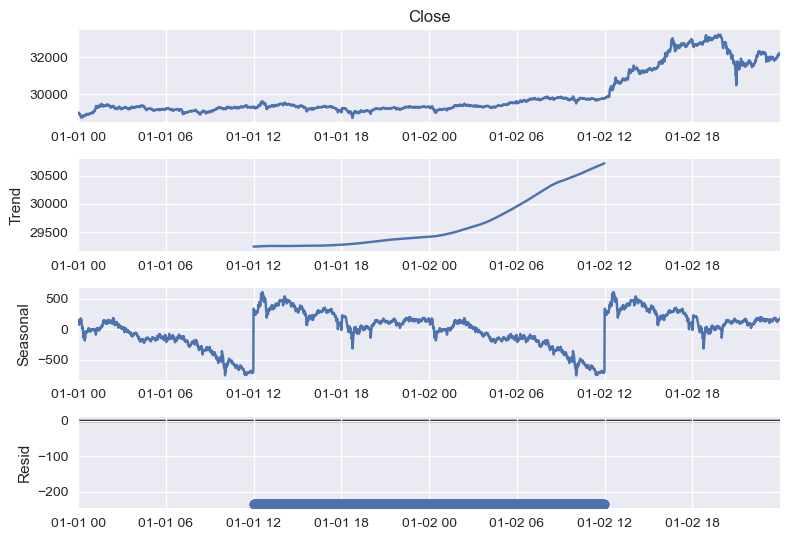

In [238]:
decomp.plot();

In [231]:
decomp = seasonal_decompose(bitcoin_df['2021-01-01':'2021-01-02']['Close'], model='multiplicative', period=24*60)

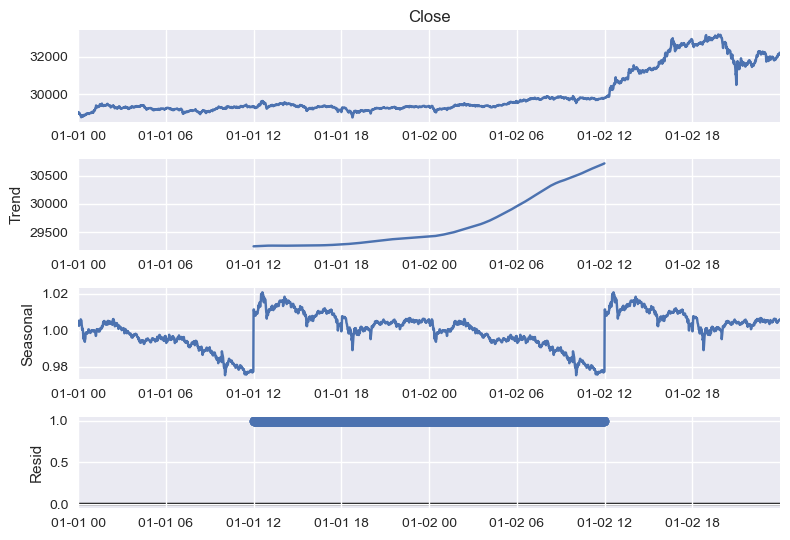

In [232]:
decomp.plot();

(array([26824320, 26825760, 26827199]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

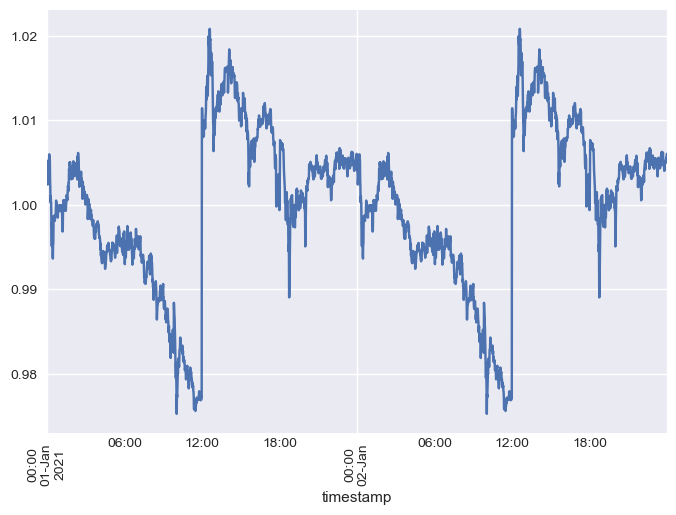

In [233]:
decomp.seasonal.plot()
plt.xticks(rotation=90)

(array([26824320, 26825760, 26827199]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

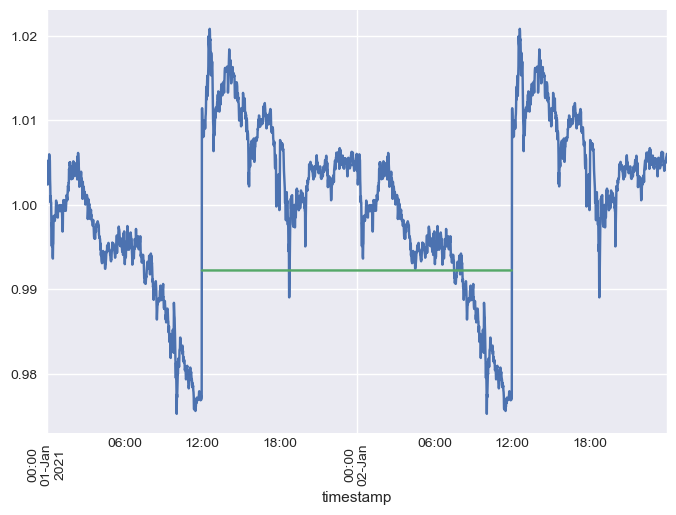

In [234]:
decomp.seasonal.plot()
decomp.resid.plot()
plt.xticks(rotation=90)

In [235]:
decomp_df = pd.concat([decomp.observed, decomp.trend, decomp.seasonal, decomp.resid], axis=1)
decomp_df.columns = ['obs', 'trend', 'seasonal', 'resid']
decomp_df.dropna(inplace=True)
decomp_df

,obs,trend,seasonal,resid
timestamp,,,,
2021-01-01 12:00:00,29344.898286,29245.529864,1.011260,0.992225
2021-01-01 12:01:00,29349.546857,29245.761872,1.011412,0.992225
2021-01-01 12:02:00,29331.687143,29245.963946,1.010790,0.992225
2021-01-01 12:03:00,29286.109836,29246.172139,1.009212,0.992225
2021-01-01 12:04:00,29288.061429,29246.363918,1.009272,0.992225
...,...,...,...,...
2021-01-02 11:55:00,29787.720000,30712.716203,0.977482,0.992225
2021-01-02 11:56:00,29775.155714,30714.660405,0.977008,0.992225
2021-01-02 11:57:00,29775.008571,30716.627471,0.976940,0.992225


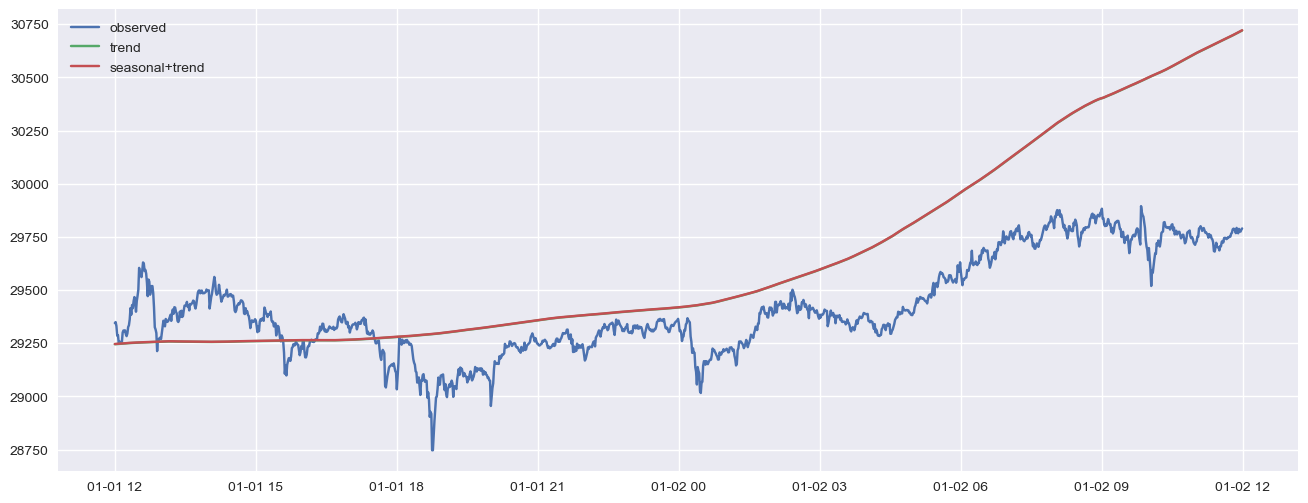

In [236]:
plt.figure(figsize=(16,6))
plt.plot(decomp_df['obs'])
plt.plot(decomp_df['trend'])
plt.plot(decomp_df['seasonal'] + decomp_df['trend'])
plt.legend(['observed', 'trend', 'seasonal+trend'])
plt.show()

In [247]:
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

In [311]:
x = np.arange(1, 1.1, 0.01)
x

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ])

In [312]:
pow(x, 3)

array([1.      , 1.030301, 1.061208, 1.092727, 1.124864, 1.157625,
       1.191016, 1.225043, 1.259712, 1.295029, 1.331   ])

Text(0, 0.5, 'Income(x3)')

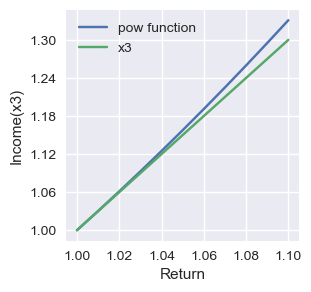

In [323]:
plt.figure(figsize=(3,3))
plt.plot(x, pow(x,3))
plt.plot(x, (x-1)*3 + 1)
plt.legend(["pow function","x3"])
plt.xticks([1, 1.02, 1.04, 1.06, 1.08, 1.1])
plt.yticks([1, 1.06, 1.12, 1.18, 1.24, 1.3])
plt.xlabel("Return")
plt.ylabel("Income(x3)")

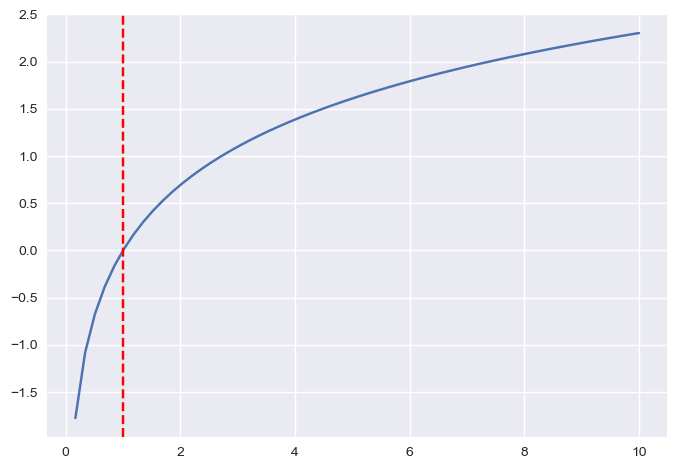

In [273]:
x_long = np.linspace(start=0, stop=10, num=60)
plt.plot(x_long, np.log(x_long))
plt.axvline(x=1, color='r', linestyle='--');